In [1]:
import sympy as sym
import numpy as np
sym.init_printing()

# Framework

We have that $X=(X_1, X_2)$ with
$$X_1 \sim \mathcal{B}(q_1), \quad X_2 \sim \mathcal{B}(q_2).$$
Additionnally, let
$$\rho = \mathbb{P}(\{X_1=1\} \cap \{X_2=1\}).$$

In [2]:
## Variables
q1, q2= sym.symbols('q1,q2', positive=True)
rho=sym.Symbol("rho")

The joint law of $X$ is given by
\begin{align*}
 p_{00} &= \mathbb{P}(\{X_1=0\} \cap \{X_2=0\}) = 1-q_1-q_2+\rho\\
 p_{01} &= \mathbb{P}(\{X_1=0\} \cap \{X_2=1\}) = q_2-\rho \\
 p_{10} &= \mathbb{P}(\{X_1=1\} \cap \{X_2=0\}) = q_1-\rho \\
 p_{11} &= \mathbb{P}(\{X_1=1\} \cap \{X_2=1\}) = \rho \\
\end{align*}

In [3]:
p00=1-q1-q2+rho
p01=q2-rho
p10=q1-rho
p11=rho

probs=[p00, p01, p10, p11]

In [4]:
## Functions
def prosca(pr,a,b): #E[ab] = a^T P b
    tmp=[x*y*z for x,y,z in zip(pr, a, b)]
    return(sum(tmp))

def norm_sq(pr, x): #E[x^2] = x^T P x
    return(prosca(pr, x,x))

def orthProj(probs, vec, subspace):
    weight=prosca(probs, vec, subspace)/norm_sq(probs, subspace)
    return([x*weight for x in subspace])

# Defining the subspaces and the canonical decomposition

First, notice that the functions of $X$ can only take four different values. Hence, any $G : \{0,1\}^2 \rightarrow \mathbb{R}$ can be represented as a vector in $\mathbb{R}^4$.

##  $V_{\emptyset}$

Notice that $V_{\emptyset}$ is comprised of constant functions of $X$. In other words, for every $v_{\emptyset} \in V_{\emptyset}$, it can be represented as
$$v_{\emptyset} = \begin{pmatrix} c\\c\\c\\c \end{pmatrix},$$
where $c \in \mathbb{R}$.

In [5]:
c=sym.Symbol("c")
ve=[c,c,c,c]
param_ve=[c]

We want to find a vector $v_{\emptyset} \in V_{\emptyset}$ such that its norm (w.r.t. the joint law of $X$) is equal to 1.

In [6]:
eq_ve=[norm_sq(probs, ve)-1] #Norm(ve) = 1
eq_ve

## $V_1$ and $V_2$
By definition, $V_1 \subset \mathbb{L}^2 (\sigma_1)$, and thus, elements of $V_1$ are functions of $X_1$. It implies that the values they take does not change w.r.t. the values taken by $X_2$. Hence, a function of $X$ in $V_1$ can be represented as
$$v_1 = \begin{pmatrix} g_0\\g_0\\g_1\\g_1 \end{pmatrix},$$
where $g_0, g_1 \in \mathbb{R}$.

In [7]:
g0,g1 = sym.symbols('g0,g1')
v1=[g0,g0,g1,g1]
param_v1=[g0,g1]

For $G_1$ to be in $V_1$, it must be orthogonal (w.r.t. the joint law to $X$) to the functions in $V_{\emptyset}$. Additionnally, we want to find a vector $v_1 \in V_1$ with unit norm.

In [8]:
eq1_v1=prosca(probs, v1, ve) #v1 \perp ve
eq2_v1=norm_sq(probs, v1)-1 #Norm(v1)= 1
eqs_v1= [eq1_v1, eq2_v1]

Analogously, since $V_2 \subset \mathbb{L}^2 (\sigma_2)$, any element of $v_2 \in V_2$ admits the form:
$$v_2 = \begin{pmatrix} h_0\\h_1\\h_0\\h_1 \end{pmatrix},$$
where $h_0, h_1 \in \mathbb{R}$.

In [9]:
h0,h1 = sym.symbols('h0,h1')
v2=[h0,h1,h0,h1]
param_v2=[h0,h1]

eq1_v2=prosca(probs, v2, ve) #v2 \perp ve
eq2_v2=norm_sq(probs, v2)-1 #Norm(v2)= 1

eqs_v2= [eq1_v2, eq2_v2]

## $V_{12}$
Since $V_{12} \subset \mathbb{L}^2 (\sigma_{12})$, any element of $v_{12} \in V_{12}$ admits the form:
$$v_{12} = \begin{pmatrix} k_{00}\\k_{01}\\k_{10}\\k_{11} \end{pmatrix},$$
where $k_{00},k_{01},k_{10},k_{11} \in \mathbb{R}$.

In [10]:
k00, k01, k10, k11 = sym.symbols('k00, k01, k10, k11')
v12=[k00, k01, k10, k11]
param_v12=[k00, k01, k10, k11]

By definition of $V_{12}$ it is the orthogonal complement in $\mathbb{L}^2(\sigma_{12}$ of 
$$V_{\emptyset} + V_1 + V_2,$$
which is equivalent to $V_{12}$ to be orthogonal to each of the summands.

In [11]:
eq1_v12=prosca(probs, v12, ve) ## v12 \perp ve
eq2_v12=prosca(probs, v12, v1) ## v12 \perp v1
eq3_v12=prosca(probs, v12, v2) ## v12 \perp v2
eq4_v12=norm_sq(probs, v12)-1 ## Norm(v12)=1

eqs_v12=[eq1_v12, eq2_v12, eq3_v12, eq4_v12]

## Canonical decomposition
Any function $G(X)$ in $\mathbb{L}^2(\sigma_{12})$ can be represented as
$$G = \begin{pmatrix} G_{00}\\G_{01}\\G_{10}\\G_{11} \end{pmatrix} $$

In [12]:
G00,G01,G10,G11 = sym.symbols('G00,G01,G10,G11')
G=[G00,G01,G10,G11]

And the canonical decomposition entails that
\begin{align*}
    G &= e \times v_{\emptyset} + \alpha \times v_{1} + \beta \times v_{2} + \delta \times v_{12} \\
    &= G_{\emptyset} + G_{1} + G_2 + G_{12}.
\end{align*}

In [13]:
alpha,beta,delta,e = sym.symbols('alpha, beta, delta, e')
decomp_params = [alpha,beta,delta,e]

eqs_params=[e*x + alpha*y + beta*z + delta*t - g for x,y,z,t, g in zip(ve, v1, v2, v12, G)]

## Solution to the problem
We have 13 parameters related to 13 different equations, which can be solved.

In [14]:
parameters= decomp_params + param_v12 + param_v2 + param_v1 + param_ve 
equations=eq_ve + eqs_v1 + eqs_v2 + eqs_v12 + eqs_params

print("Number of parameters:")
print(len(parameters))

print("Number of equations:")
print(len(equations))

Number of parameters:
13
Number of equations:
13


In [15]:
%%time
res_params=sym.solve(equations,
                     parameters,
                     dict=True,
                    check=False)

Wall time: 44.9 s


In [16]:
e_=res_params[2][e]
ve=[res_params[2][c], res_params[2][c], res_params[2][c], res_params[2][c]]

alpha_=res_params[2][alpha]
v1 = [res_params[2][g0], res_params[2][g0], res_params[2][g1], res_params[2][g1]]

beta_=res_params[2][beta]
v2 = [res_params[2][h0], res_params[2][h1], res_params[2][h0], res_params[2][h1]]

delta_=res_params[2][delta]
v12 = [res_params[2][k00], res_params[2][k01], res_params[2][k10], res_params[2][k11]]

In [17]:
Ge=[sym.simplify(e_*x).factor(G00,G01,G10,G11) for x in ve]
G1=[sym.simplify(alpha_*x).factor(G00,G01,G10,G11) for x in v1]
G2=[sym.simplify(beta_*x).factor(G00,G01,G10,G11) for x in v2]
G12=[sym.simplify(delta_*x).factor(G00,G01,G10,G11) for x in v12]

## Observations and verification

### Evaluation decomposition
$$G(X) = eV_{\emptyset} + \alpha V_1 + \beta V_2 + \delta V_{12}$$

In [18]:
[sym.simplify(x + y + z + t) for x,y,z,t in zip(Ge, G1, G2, G12)]

### $e$ is equal to the expectation of $G(X)$:
$$e = \mathbb{E}[G(X)]$$

In [19]:
sym.simplify(prosca(probs, G, [1,1,1,1]) - e_)==0

True

### Variance decomposition
$$\mathbb{E}[G^2(X)] = e^2 + \alpha^2 + \beta^2 + \delta^2 + 2\alpha\beta \mathbb{E}[V_1(X_1), V_2(X_2)]$$

In [20]:
normG= e_**2 + alpha_**2 + beta_**2 + delta_**2 + 2*alpha_*beta_*prosca(probs, v1,v2)
sym.simplify(norm_sq(probs, G) - normG) == 0

True

### Annihilating property

#### $V_{12}$

$$P_{1}(Q_{12}(G(X))) = 0$$

In [21]:
[sym.simplify(x) for x in orthProj(probs, G12, v1)]

$$P_{2}(Q_{12}(G(X))) = 0$$

In [22]:
[sym.simplify(x) for x in orthProj(probs, G12, v2)]

$$P_{\emptyset}(Q_{12}(G(X))) = 0$$

In [23]:
[sym.simplify(x) for x in orthProj(probs, G12, ve)]

#### $V_1$
$$P_{\emptyset}(Q_{1}(G(X))) = 0$$

In [24]:
[sym.simplify(x) for x in orthProj(probs, G1, ve)]

#### $V_2$
$$P_{\emptyset}(Q_{2}(G(X))) = 0$$

In [25]:
[sym.simplify(x) for x in orthProj(probs, G2, ve)]

### Correlation of $X$ and $c_0(V_1,V_2)$

$$c_0(V_1, V_2) = \mathbb{E}[v_1(X_1)v_2(X_2)] = \textrm{Corr}(X_1, X_2)$$

In [26]:
corrX=(rho-q1*q2)/(sym.sqrt(q1*(1-q1))*sym.sqrt(q2*(1-q2)))
sym.simplify(prosca(probs, v1,v2) - corrX)

### Bounds for definite-positiveness of $\Delta$

$\Delta$ is definite-positive if
$$|\mathbb{E}[v_1(X_1)v_2(X_2)]|<1$$
which restricts rho to takes the values:

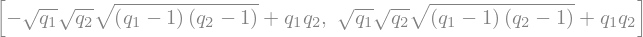

In [27]:
bd_rho=sym.solve(sym.sqrt(prosca(probs, v1,v2)**2)-1, rho)
bd_rho

# Evaluation Decomposition

## Canonical Evaluation Decomposition

$G(X) = eV_{\emptyset} + \alpha V_1 + \beta V_2 + \delta V_{12}$

In [28]:
[sym.simplify(x + y + z + t) for x,y,z,t in zip(Ge, G1, G2, G12)]

## Canonical Shapley

In [29]:
CSh1 = [sym.simplify(x+sym.Rational("1/2")*y) for x,y in zip(G1, G12)]
CSh2 = [sym.simplify(x+sym.Rational("1/2")*y) for x,y in zip(G2, G12)]

In [30]:
[sym.simplify(x+y+z) for x,y,z in zip(Ge, CSh1, CSh2)]

# Variance Decomposition

## Organic indices

### Pure interaction

In [31]:
%%time
Se=sym.simplify(norm_sq(probs,Ge).subs(rho, q1*q2))
S1=sym.simplify(norm_sq(probs,G1).subs(rho, q1*q2))
S2=sym.simplify(norm_sq(probs,G2).subs(rho, q1*q2))
S12=sym.simplify(norm_sq(probs,G12).subs(rho, q1*q2))
S=[Se, S1, S2, S12]

Wall time: 2.37 s


### Dependence indices

In [32]:
%%time
Pe=orthProj(probs, G, ve)
P1=orthProj(probs, G, v1)
P2= orthProj(probs, G, v2)
P12= orthProj(probs, G, v12)

De=sym.simplify(norm_sq(probs, [sym.simplify(x-y) for x,y in zip(Ge, Pe)]))
D1=sym.simplify(norm_sq(probs, [sym.simplify(x-y) for x,y in zip(G1, P1)]))
D2=sym.simplify(norm_sq(probs, [sym.simplify(x-y) for x,y in zip(G2, P2)]))
D12=sym.simplify(norm_sq(probs, [sym.simplify(x-y) for x,y in zip(G12, P12)]))
D=[De, D1, D2, D12]

Wall time: 49.6 s


## Canonical indices
### Structural indices

In [33]:
%%time
Sue=sym.simplify(norm_sq(probs, Ge))
Su1=sym.simplify(norm_sq(probs, G1))
Su2=sym.simplify(norm_sq(probs, G2))
Su12=sym.simplify(norm_sq(probs, G12))
Su=[Sue, Su1, Su2, Su12]

Wall time: 11 s


### Correlative indices

In [34]:
%%time
Sce=sym.zeros(1)[0]
Sc1=sym.simplify(prosca(probs, G1,G2))
Sc2=sym.simplify(prosca(probs, G2,G1))
Sc12=sym.zeros(1)[0]
Sc=[Sce, Sc1, Sc2, Sc12]

Wall time: 11.5 s


# Case of $q_1=q_2=0.5$

In [35]:
rplc=[(q1, sym.Rational("1/2")), (q2,sym.Rational("1/2"))]

## Evaluation decomposition

$$e \times v_{\emptyset} $$

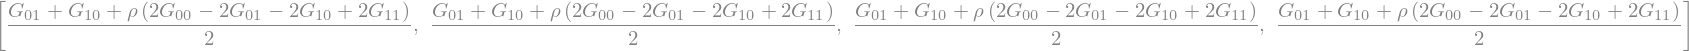

In [36]:
[sym.simplify((e_*x).subs(rplc)).factor(rho) for x in ve]

$$\alpha \times v_1$$

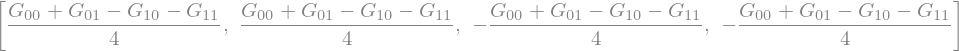

In [37]:
[sym.simplify((alpha_*x).subs(rplc)).factor() for x in v1]

$$\beta \times v_2$$

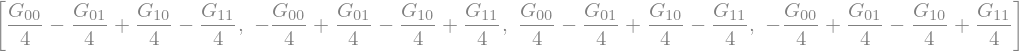

In [38]:
[sym.simplify((beta_*x).subs(rplc)) for x in v2]

$$\delta \times v_2$$

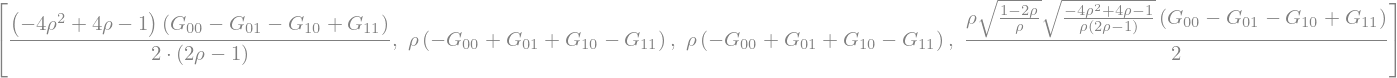

In [39]:
[sym.simplify((delta_*x).subs(rplc)) for x in v12]

## Variance Decomposition

### Organic indices

#### Pure interaction

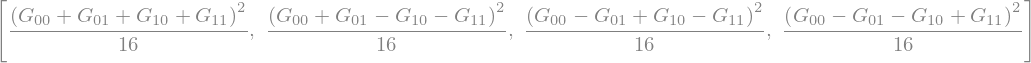

In [40]:
[sym.simplify(x.subs(rplc)) for x in S]

#### Dependence indices

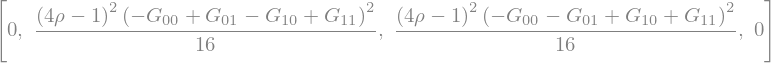

In [41]:
[sym.simplify(x.subs(rplc)).factor(rho) for x in D]

### Canonical indices
#### Structural indices

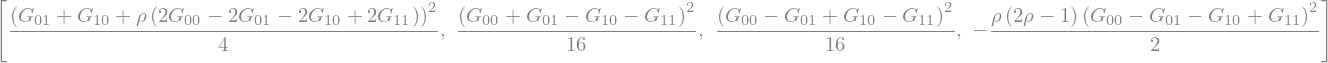

In [42]:
[sym.simplify(x.subs(rplc)).factor(rho) for x in Su]

#### Correlative indices

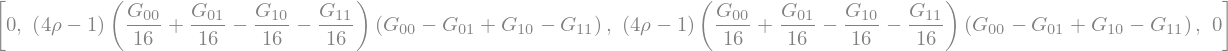

In [43]:
[sym.simplify(x.subs(rplc)).factor(rho) for x in Sc]

# Further numerical testing

In [44]:
# Some Boolean function valued in R
def model(x1,x2):
    return(x1+x2-2*np.exp(x1*x2) + 5*np.log(np.pi)**(x1*x2))

#Marginal probabilities
p1,p2=np.random.random_sample(size=2)

# Lower and upper bounds on the correlation between X1 and X2
L = max(0, p1+p2-1)
U = min(p1,p2)

#Random sample of the correlation
p12=(L-U)*np.random.random_sample(1)[0] + U



#Sample the values of G
g00 = model(0,0)
g01 = model(0,1)
g10 = model(1,0)
g11 = model(1,1)

Gb = [g00, g01, g10, g11]


#Vector of replacements for the sympy formulas
rplc=[(q1, p1), (q2, p2), (rho, p12), (G00, g00), (G01, g01), (G10, g10), (G11, g11)]

#Variance of G under dependence
VG=(norm_sq(probs, Gb)).subs(rplc)

#Variance of G under mutual independence
VG_=(norm_sq(probs, Gb)).subs(rho, q1*q2).subs(rplc)



print('Var G')
print(VG)
print("\n")

print('Var G indep')
print(VG_)
print("\n")

print('Probas : q1, q2, rho')
print([p1, p2, p12])
print("\n")

print('Correlation X1 and X2')
print((p12-p1*p2)/(np.sqrt(p1*(1-p1))*np.sqrt(p2*(1-p2))))
print("\n")

print('c(L²(1),L²(2))')
print(prosca(probs, v1,v2).subs(rplc))
print("\n")

print('rho LU bounds')
print([L,U])
print("\n")

print("rho DP bounds")
dpb=[max(0,bd_rho[0].subs([(q1,p1),(q2,p2)])), min(1, bd_rho[1].subs([(q1,p1),(q2,p2)]))]
print(dpb)
print("\n")

print('Values : G00, G01, G10, G11')
print([g00, g01, g10, g11])
print("\n")

print('##########################################################################')
print('Evaluation decomposition')
print('##########################################################################\n')
print("Ge")
print([sym.simplify(x.subs(rplc)) for x in Ge])
print("G1")
print([sym.simplify(x.subs(rplc)) for x in G1])
print("G2")
print([sym.simplify(x.subs(rplc)) for x in G2])
print("G12")
print([sym.simplify(x.subs(rplc)) for x in G12])
print("Ge + G1 + G2 + G12")
print([sym.simplify((x+y+z+t).subs(rplc)) for x,y,z,t in zip(Ge, G1, G2, G12)])
print("\n")

print('##########################################################################')
print('Organic decomposition')
print('##########################################################################\n')

print('Pure interaction')
print([sym.simplify(x.subs(rplc)/VG_) for x in S])
print(sum([sym.simplify(x.subs(rplc)/VG_) for x in S]))
print("\n")

print('Dependence indices')
print([sym.simplify(x.subs(rplc)/VG) for x in D])
print(sum([sym.simplify(x.subs(rplc)/VG) for x in D]))
print("\n")


print('##########################################################################')
print('Canonical Decomposition')
print('##########################################################################\n')
print('Structural indices')
print([sym.simplify(x.subs(rplc)/VG) for x in Su])
print(sum([sym.simplify(x.subs(rplc)/VG) for x in Su]))
print("\n")


print('Correlative indices')
print([sym.simplify(x.subs(rplc)/VG) for x in Sc])
print(sum([sym.simplify(x.subs(rplc)/VG) for x in Sc]))
print("\n")

Var G
13.6806203605639


Var G indep
13.4088889317681


Probas : q1, q2, rho
[0.028850246229265686, 0.6484828481519346, 0.003416651733481213]


Correlation X1 and X2
-0.19135097530836204


c(L²(1),L²(2))
-0.191350975308362


rho LU bounds
[0, 0.028850246229265686]


rho DP bounds
[0, 0.0986261104729329]


Values : G00, G01, G10, G11
[3.0, 4.0, 4.0, 2.2870857723289104]


##########################################################################
Evaluation decomposition
##########################################################################

Ge
[3.66806401128244, 3.66806401128244, 3.66806401128244, 3.66806401128244]
G1
[-0.0189952475655124, -0.0189952475655124, 0.639413260097192, 0.639413260097192]
G2
[-0.624353328200793, 0.338437484200944, -0.624353328200793, 0.338437484200944]
G12
[-0.0247154355161360, 0.0124937520821266, 0.316876056821160, -2.35882898325167]
Ge + G1 + G2 + G12
[3.00000000000000, 4.00000000000000, 4.00000000000000, 2.28708577232891]


###############################